# Part 1

## DOMAIN: Automobile 

## CONTEXT: 

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes

## DATA DESCRIPTION: 

The data concerns city-cycle fuel consumption in miles per gallon 

## Attribute Information: 

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance) 

## PROJECT OBJECTIVE: 

Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 

Steps and tasks: 

1. Import and warehouse data:

• Import all the given datasets and explore shape and size. 

• Merge all datasets onto one and explore final shape and size.

• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

• Import the data from above steps into python.

2. Data cleansing:

• Missing/incorrect value treatment

• Drop attribute/s if required using relevant functional knowledge

• Perform another kind of corrections/treatment on the data.

3. Data analysis & visualisation: 

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

4. Machine learning: 

• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 

• Share your insights about the difference in using these two methods. 

5. Answer below questions based on outcomes of using ML based methods.

• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

• Use linear regression model on different clusters separately and print the coefficients of the models individually

• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

6. Improvisation: 

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import zscore

In [2]:
car_names_df=pd.read_csv('Part1 - Car name.csv')
car_names_df

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [3]:
import json

f= open('Part1 - Car-Attributes.json')

data=json.load(f)

f.close()

df_json=pd.json_normalize(data)
df_json

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [4]:
df=df_json.join(car_names_df)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
df.to_csv('cardata_csv.csv')
df.to_excel('cardata_xlsx.xlsx')
df.to_json('cardata_json.json')

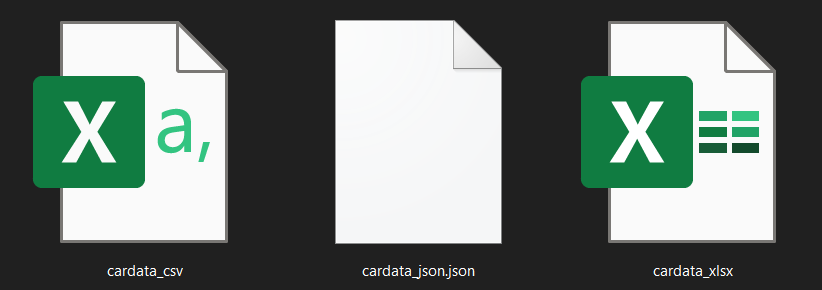

The above files are a screenshot from my current working directory.

In [6]:
df.describe(include='all')

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
count,398.000000,398.000000,398.000000,398.0,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [9]:
col=pd.DataFrame(df.hp.str.isdigit())
df[col['hp']==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [10]:
df.hp = df.hp.replace('?', np.nan)
df.hp = df.hp.astype(float)
df.hp = df.hp.replace(np.nan, df.hp.median())

Statistical analysis

In [11]:
df.describe(include='all')

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN


univariate

In [12]:
print(df.cyl.nunique())
print(df.yr.nunique())
print(df.origin.nunique())

5
13
3


<AxesSubplot:xlabel='mpg', ylabel='Count'>

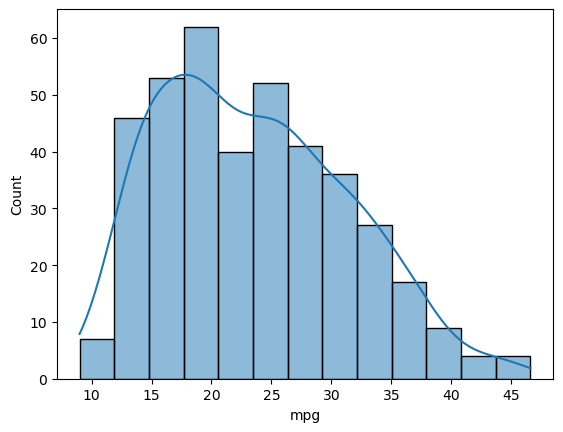

In [13]:
sns.histplot(df.mpg,kde='True')

<AxesSubplot:xlabel='cyl', ylabel='Count'>

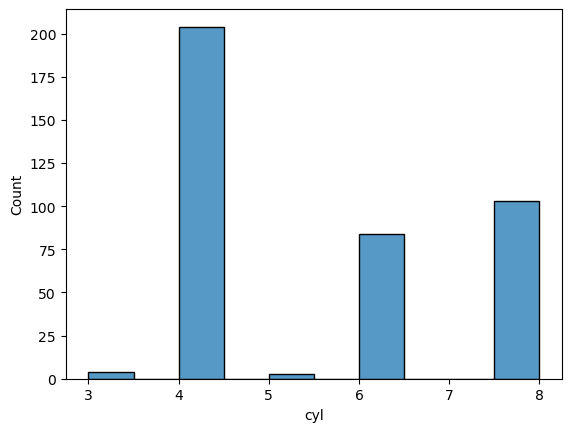

In [14]:
sns.histplot(df.cyl)

<AxesSubplot:xlabel='disp', ylabel='Count'>

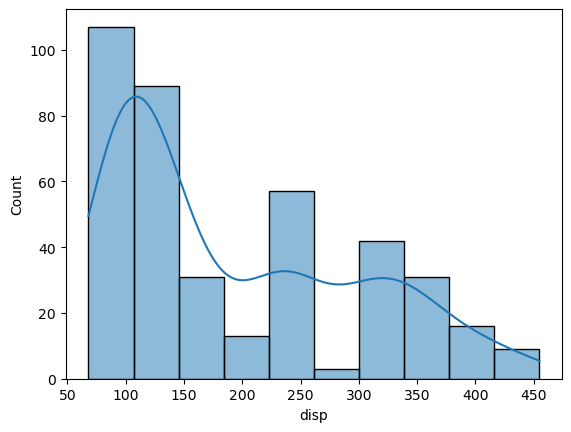

In [15]:
sns.histplot(df.disp,kde='True')

<AxesSubplot:xlabel='hp', ylabel='Count'>

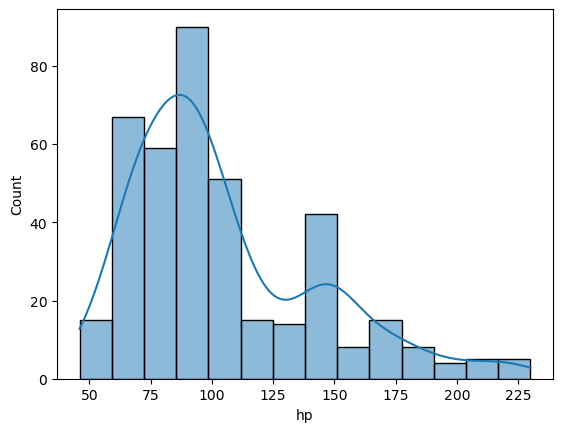

In [16]:
sns.histplot(df.hp,kde='True')

<AxesSubplot:xlabel='wt', ylabel='Count'>

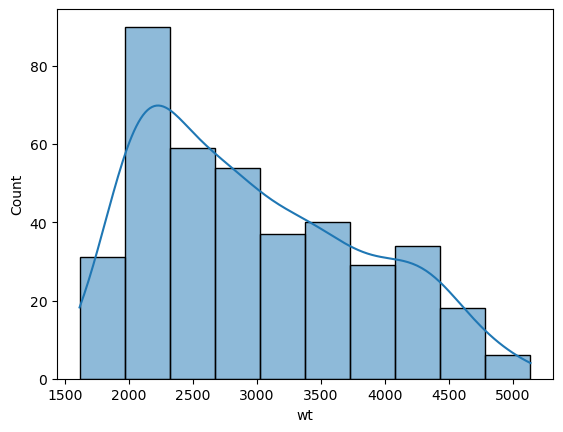

In [17]:
sns.histplot(df.wt,kde='True')

<AxesSubplot:xlabel='acc', ylabel='Count'>

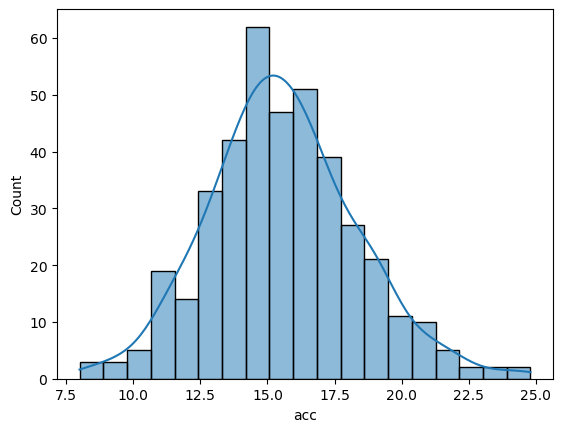

In [18]:
sns.histplot(df.acc,kde='True')

<AxesSubplot:xlabel='yr', ylabel='Count'>

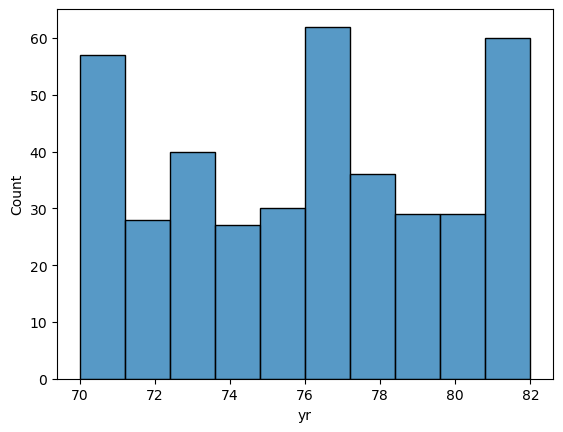

In [19]:
sns.histplot(df.yr)

<AxesSubplot:xlabel='origin', ylabel='Count'>

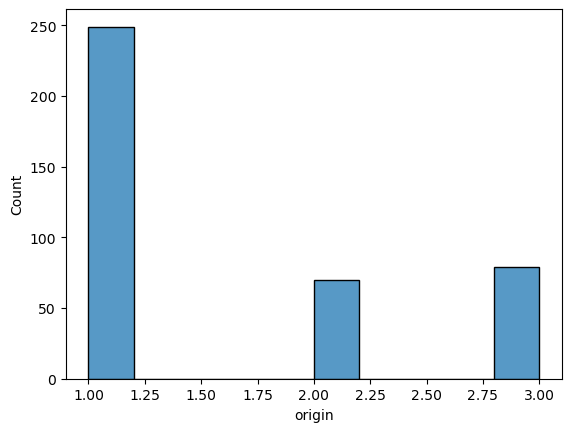

In [20]:
sns.histplot(df.origin)

bivariate

<Figure size 2000x1000 with 0 Axes>

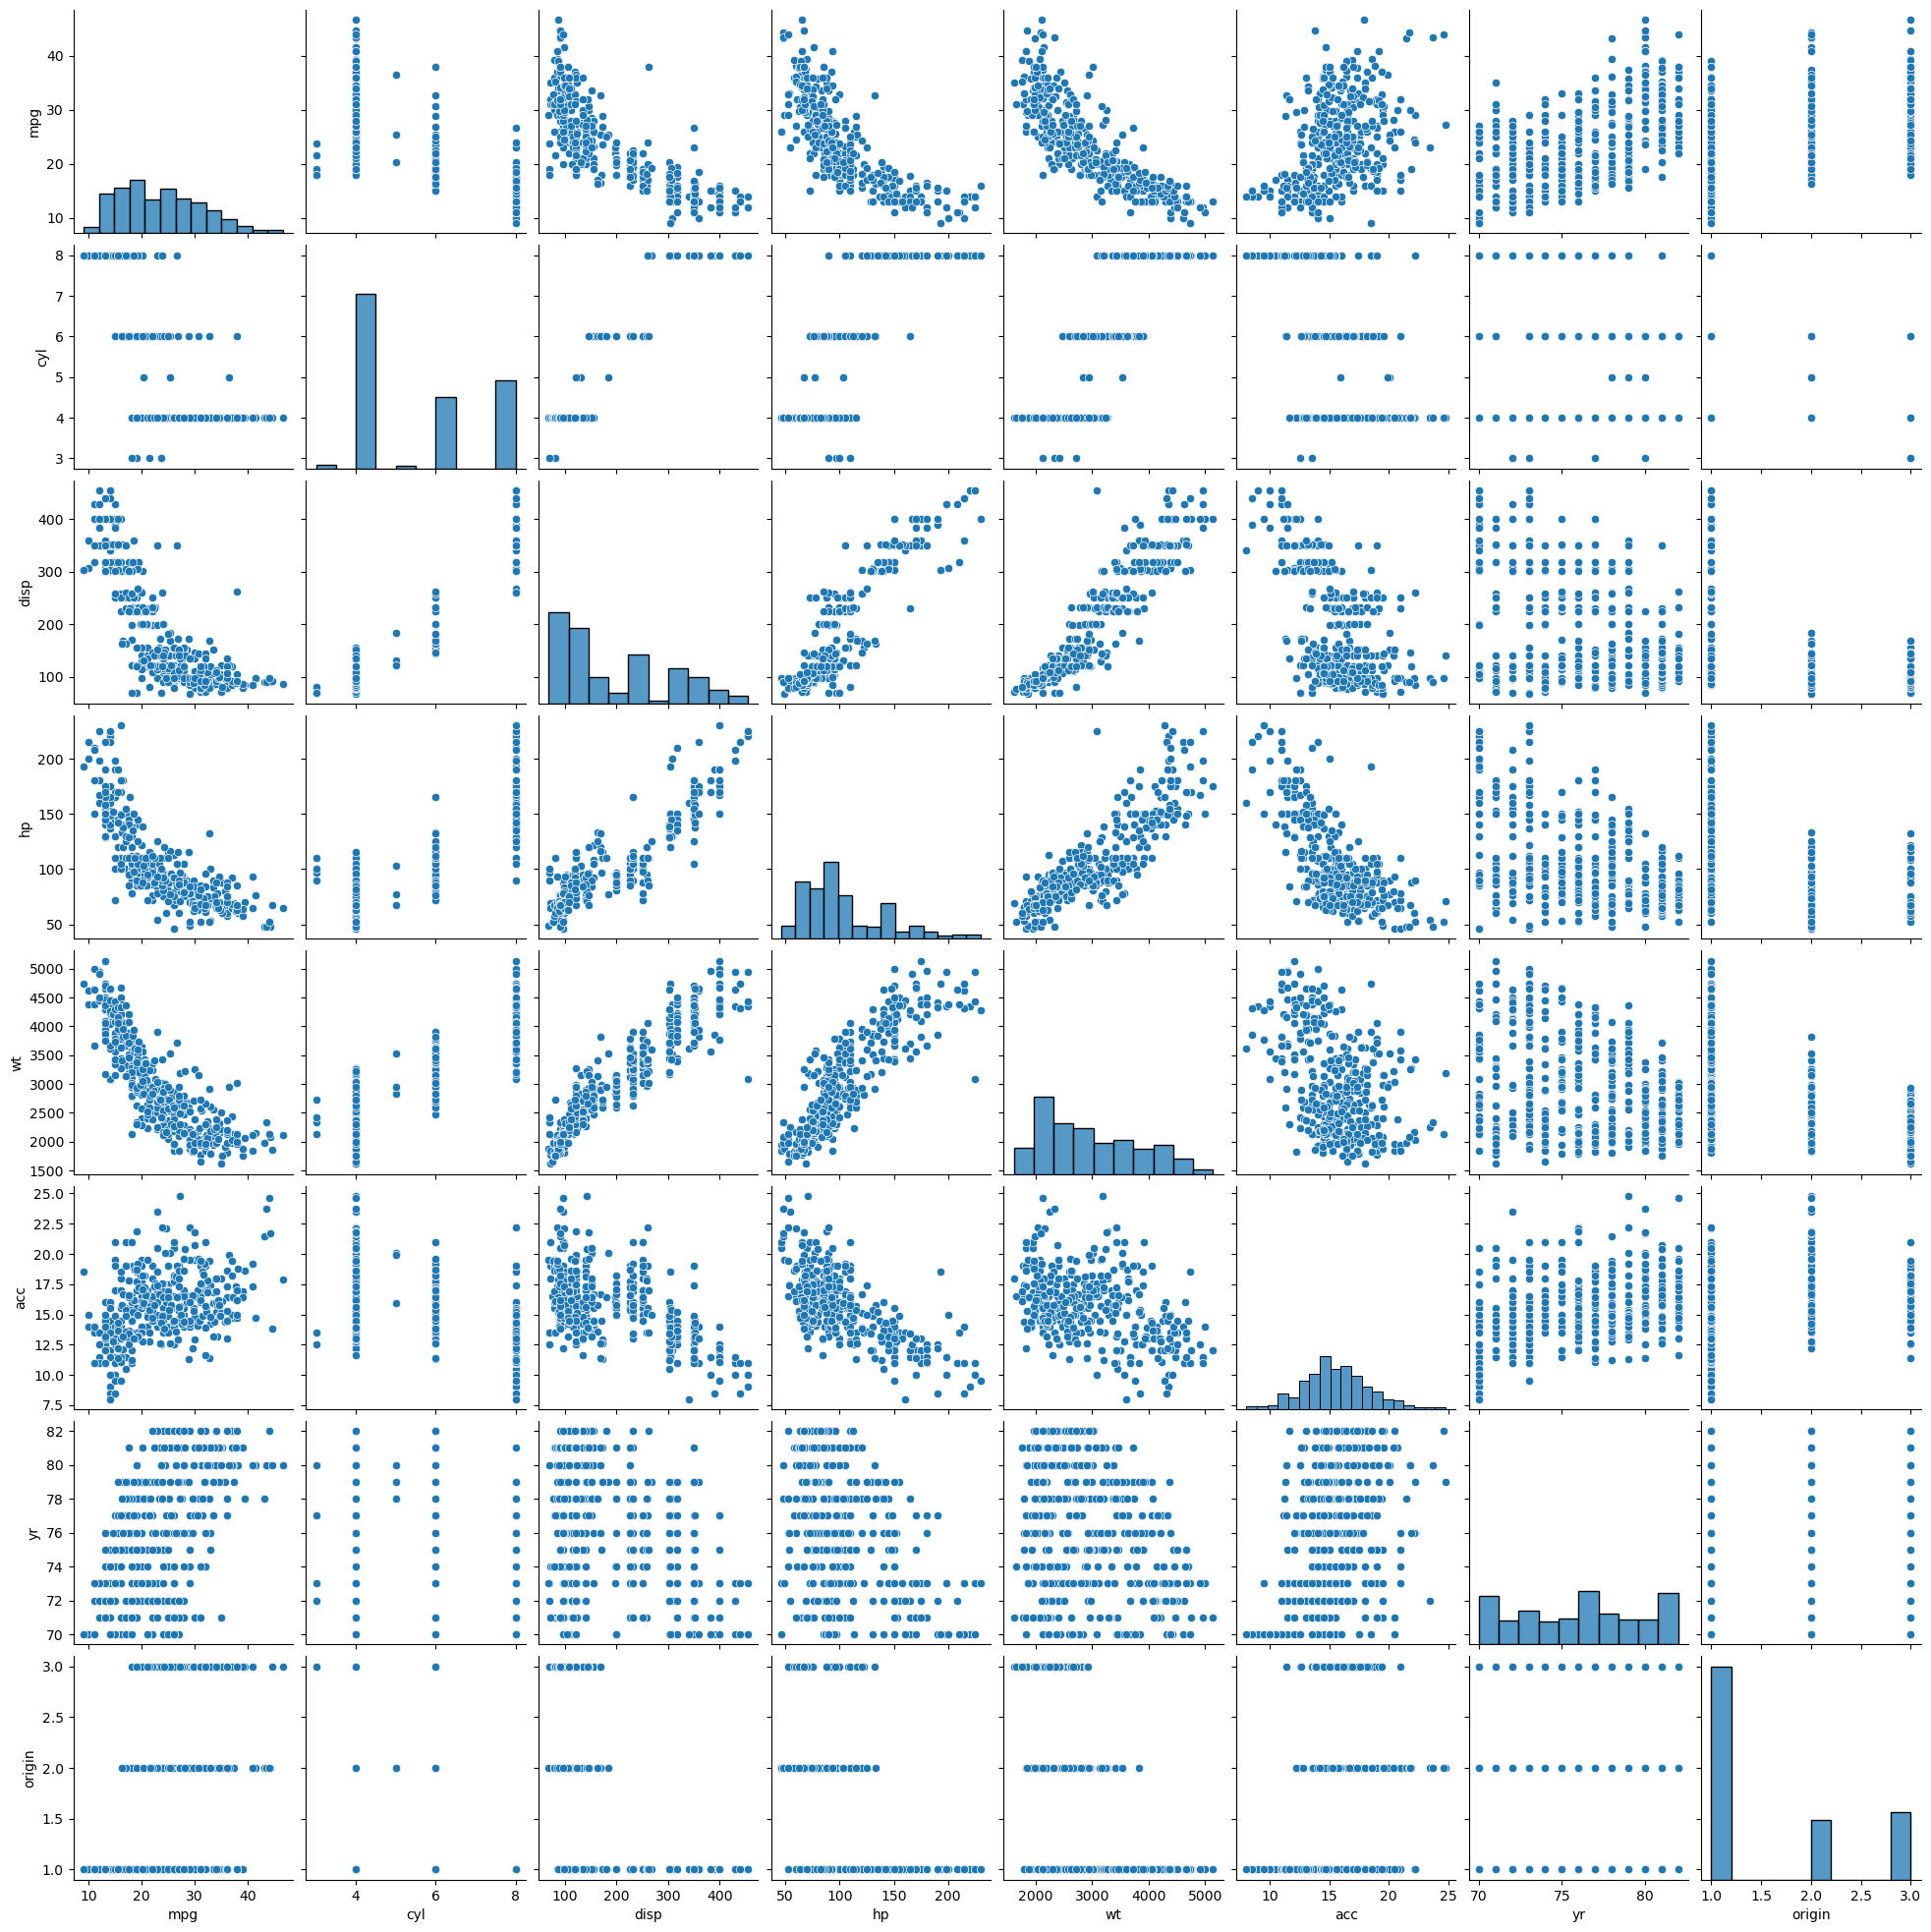

In [21]:
plt.figure(figsize=(20, 10))
sns.pairplot(df)
plt.show()

The columns origin and car_name are not useful for clustering. Thus, we drop them.

In [22]:
dfx=df.drop(['origin','car_name'],axis=1)
dfx

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


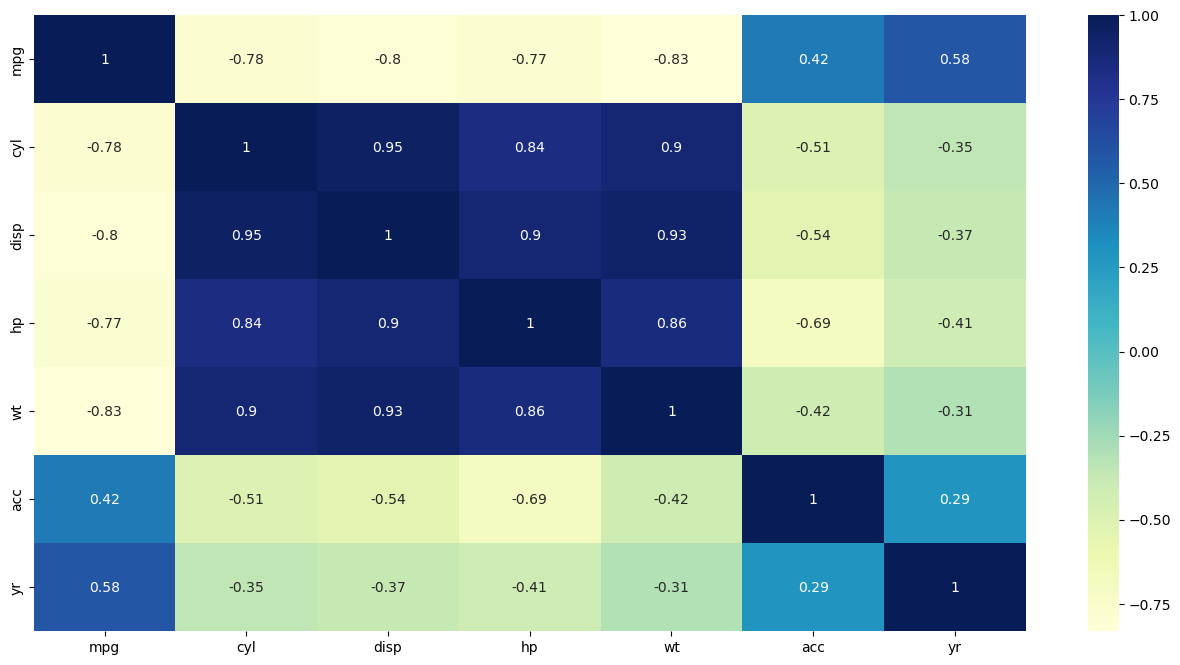

In [23]:
cor = dfx.corr()
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [24]:
#Scale the data
from scipy.stats import zscore
scaled_df = dfx.apply(zscore)
scaled_df

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983


## Kmeans clustering

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction=model.predict(scaled_df)
    meanDistortions.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])


plt.plot(clusters, meanDistortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

C:\Users\ac253\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ac253\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ac253\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ac253\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

In [ ]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(scaled_df)
prediction=final_model.predict(scaled_df)

#Append the prediction 
scaled_df["cluster_kmeans"] = prediction
dfx["cluster_kmeans"] = prediction
print("Clusters Assigned : \n")
dfx

In [ ]:
dfx.cluster_kmeans.value_counts()

## Hierarchial Clustersing

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model.fit(scaled_df)

#Append the prediction 
scaled_df["cluster_hierarcial"] = model.labels_
dfx["cluster_hierarchial"] = model.labels_
print("Clusters Assigned : \n")
dfx

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(scaled_df))

c

In [ ]:
dfx.cluster_hierarchial.value_counts()

In [ ]:
kmeans_clust= dfx.groupby(['cluster_kmeans'])
kmeans_clust.mean()

In [ ]:
scaled_df.boxplot(by='cluster_kmeans', layout = (2,4),figsize=(15,10))

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

In [ ]:
Z = linkage(scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(scaled_df))

c

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=4,truncate_mode='lastp', leaf_rotation=90.,color_threshold = 600, leaf_font_size=8. )
plt.tight_layout()

## 5.  Answer to questions

#### 5.A Using elbow method we determined that the optimal number of clusters in the dataset is 4.

## Linear Regression

### For Linear regression, We will use the clusters we obtained from K Means Clustering. 
#### Lets prepare the dataset by dropping the clusters assigned by Hierarchial Clustering and seperating the clusters in four different datasets.

In [ ]:
scaled_df

In [ ]:
new_df=scaled_df.drop(['cluster_hierarcial'],axis=1)
new_df

In [ ]:
new_df1=new_df.loc[new_df['cluster_kmeans']==0]
new_df2=new_df.loc[new_df['cluster_kmeans']==1]
new_df3=new_df.loc[new_df['cluster_kmeans']==2]
new_df4=new_df.loc[new_df['cluster_kmeans']==3]

In [ ]:
X1 = new_df1.drop(['mpg','cluster_kmeans'], axis=1)
y1 = new_df1[['mpg']]

In [ ]:
X2 = new_df2.drop(['mpg','cluster_kmeans'], axis=1)
y2 = new_df2[['mpg']]

In [ ]:
X3 = new_df3.drop(['mpg','cluster_kmeans'], axis=1)
y3 = new_df3[['mpg']]

In [ ]:
X4 = new_df4.drop(['mpg','cluster_kmeans'], axis=1)
y4 = new_df4[['mpg']]

### Splitting all the datasets in train datasets and test datasets

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=1)

## Fitting Linear Regression models

In [ ]:
regression_model1 = LinearRegression()
regression_model1.fit(X1_train, y1_train)
print("coefficients of the model for cluster 1 are :")
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

In [ ]:
regression_model2 = LinearRegression()
regression_model2.fit(X2_train, y2_train)
print("coefficients of the model for cluster 2 are :")
for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

In [ ]:
regression_model3 = LinearRegression()
regression_model3.fit(X3_train, y3_train)
print("coefficients of the model for cluster 3 are :")
for idx, col_name in enumerate(X3_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[0][idx]))

In [ ]:
regression_model4 = LinearRegression()
regression_model4.fit(X4_train, y4_train)
print("coefficients of the model for cluster 4 are :")
for idx, col_name in enumerate(X4_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model4.coef_[0][idx]))

### The score (R^2) for in-sample and out of sample

In [ ]:
print("in-sample : " , regression_model1.score(X1_train, y1_train))
print("out-sample : " , regression_model1.score(X1_test, y1_test))

In [ ]:
print("in-sample : " , regression_model2.score(X2_train, y2_train))
print("out-sample : " , regression_model2.score(X2_test, y2_test))

In [ ]:
print("in-sample : " , regression_model3.score(X3_train, y3_train))
print("out-sample : " , regression_model3.score(X3_test, y3_test))

In [ ]:
print("in-sample : " , regression_model4.score(X4_train, y4_train))
print("out-sample : " , regression_model4.score(X4_test, y4_test))

### Due to splitting the data on the custers we get different co-efficients for each linear regression model. Thus, predicting the data more accurately.

## 6. Improvisation:

Other parameters that can be used to get a better prediction of the automobile is the data which can be obtained from the physical verification of the condition of the car compared to a new car. 
Factors such as poor maintainance of engine, improper engine tuning can cause the vehicle to lose the performance in terms of mileage.
A report of a mechanic on said parameters will be helpful to get even accurate picture of data.

# Part Two

## DOMAIN: Manufacturing

## CONTEXT: 

Company X curates and packages wine across various vineyards spread throughout the country.

## DATA DESCRIPTION: 
The data concerns the chemical composition of the wine and its respective quality.

Attribute Information: 

1. A, B, C, D: specific chemical composition measure of the wine

2. Quality: quality of wine [ Low and High ]

## PROJECT OBJECTIVE: 

Goal is to build a synthetic data generation model using the existing data provided by the company.

### Steps and tasks: 

1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [ ]:
wine_data=pd.read_excel("Part2 - Company.xlsx")
wine_data

In [ ]:
wine_data.info()

In [ ]:
wine_data.describe(include='all')

In [ ]:
wine_data.Quality.value_counts()

### Lets convert the Quality attribute to numerical value. 0 for Quality A and 1 for Quality B

In [ ]:
replace_struct = {"Quality":     {"Quality A": 0, "Quality B": 1}}
wine_data = wine_data.replace(replace_struct)

In [ ]:
wine_data.isnull().sum()

In [ ]:
X = wine_data.drop("Quality", axis = 1)
y = wine_data[['Quality']]
print(X)
y

### Here, we are applying K means clustering with number of clusters as 2 because of the two different qualities of wine.

In [ ]:
model=KMeans(2)
model.fit(X)
prediction=model.predict(X)

#Append the prediction 
wine_data["pred"] = prediction
wine_data

In [ ]:
known_quality = wine_data[wine_data.Quality.notnull()]
unknown_quality = wine_data[wine_data.Quality.isnull()]
print(known_quality)
print(unknown_quality)

In [ ]:
from sklearn import metrics

#confusion matirx of known data
print(metrics.confusion_matrix(y_true=known_quality.Quality, y_pred=known_quality.pred))

# accuracy of known data
print("accuracy", metrics.accuracy_score(known_quality.Quality,known_quality.pred))

### We have got 100% accuracy from k means clustering on our wine data. Thus, we can predict the quality of the wine wherever empty the company has missed recording the data.

In [ ]:
final_wine_data= wine_data.drop('Quality',axis=1)
sns.pairplot(final_wine_data, hue='pred')

### In the above pair plot we have demostrated the different clusters in the data.

# Part Three

## DOMAIN: Automobile 

## CONTEXT: 

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

## DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette.

## PROJECT OBJECTIVE: 
Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

Steps and tasks: 

1. Data: Import, clean and pre-process the data

2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.

For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. 

3. Classifier: Design and train a best fit SVM classier using all the data attributes.

4. Dimensional reduction: perform dimensional reduction on the data.

5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.

6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

In [ ]:
import numpy as np   
from sklearn import svm
import pandas as pd    
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
data3=pd.read_csv('Part3 - vehicle.csv')
data3

In [ ]:
data3.info()

In [ ]:
data3.describe(include='all')

In [ ]:
replace_struct = {"class":     {"car": 0, "van": 1,"bus": 2}}
data3 = data3.replace(replace_struct)

In [ ]:
data3.isnull().sum()

In [ ]:
#instead of dropping the rows, lets replace the missing values with median value. 
data3.median()

In [ ]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)

medianFiller = lambda x: x.fillna(x.median())
data3 = data3.apply(medianFiller,axis=0)

In [ ]:
X = data3.drop("class", axis = 1)
y = data3[['class']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
clf = svm.SVC(C=1000)

In [ ]:
clf.fit(X_train , y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

Kfold crossvalidation

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = svm.SVC(C = 1000)

In [ ]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [ ]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

In [ ]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = svm.SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)     

In [ ]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train) 

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

PCA

In [ ]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

In [ ]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

In [ ]:
pca = PCA(n_components=18)
pca.fit(XScaled)

In [ ]:
print(pca.explained_variance_) #eigen values

In [ ]:
print(pca.components_) #eigen vectors

In [ ]:
print(pca.explained_variance_ratio_) #And the percentage of variation explained by each eigen Vector

In [ ]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

In [ ]:
Xpca6=pd.DataFrame(Xpca6)
Xpca6

In [ ]:
sns.pairplot(Xpca6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 1)

## Fitting over SVM

Lets construct SVM using PCA. Previously, we have constructed a SVM with all the 18 independent variables. Now, we will construct a SVM with only the 6 new variables constructed using PCA.

In [ ]:
clf = svm.SVC(C=100)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

Kfold crossvalidation on PCA dataset

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = svm.SVC(C = 1000)

In [ ]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [ ]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

In [ ]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = svm.SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)     

In [ ]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train) 

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Looks like by drop reducing dimensionality by 12, we only dropped around 8% in accuracy. It seems easy to justify the dropping of variables. An out of sample (on test data), with the 6 independent variables is likely to do better since that would be less of an over-fit.

# Part Four

## DOMAIN: Sports management 

## CONTEXT: 
Company X is a sports management company for international cricket. 

## DATA DESCRIPTION: 

The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: 

1. Runs: Runs score by the batsman

2. Ave: Average runs scored by the batsman per match

3. SR: strike rate of the batsman

4. Fours: number of boundary/four scored

5. Six: number of boundary/six scored

6. HF: number of half centuries scored so far

## PROJECT OBJECTIVE: 

Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

### Steps and tasks: 
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [ ]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
sports_data = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")  
sports_data

In [ ]:
sports_data.isnull().sum()

In [ ]:
sports_data=sports_data.dropna()
sports_data

### Name attribute is not useful for PCA. So we drop that attribute.

In [ ]:
Names=sports_data[['Name']]
sports_data.drop("Name", axis = 1,inplace=True)

### Univariate

In [ ]:
sns.histplot(sports_data.Runs,kde=True)

In [ ]:
sns.histplot(sports_data.Ave,kde=True)

In [ ]:
sns.histplot(sports_data.SR,kde=True)

In [ ]:
sns.histplot(sports_data.Fours,kde=True)

In [ ]:
sns.histplot(sports_data.Sixes,kde=True)

In [ ]:
sns.histplot(sports_data.HF,kde=True)

Bivariate

In [ ]:
sns.pairplot(sports_data, diag_kind='kde')

In [ ]:
from scipy.stats import zscore
sports_scaled=sports_data.apply(zscore)
sports_scaled.head()

In [ ]:
covMatrix = np.cov(sports_scaled,rowvar=False)
print(covMatrix)

In [ ]:
pca = PCA(n_components=6)
pca.fit(sports_scaled)

The eigen Values

In [ ]:
print(pca.explained_variance_)

The eigen Vectors

In [ ]:
print(pca.components_)

And the percentage of variation explained by each eigen Vector

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

Now 4 dimensions seems very reasonable. With 4 variables we can explain over 95% of the variation in the original data!

In [ ]:
pca4 = PCA(n_components=4)
pca4.fit(sports_scaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(sports_scaled)
print(pca4.explained_variance_ratio_.shape)

In [ ]:
sports_reduced = pca4.fit_transform(sports_scaled)
recovered_sports_data = pca4.inverse_transform(sports_reduced)
recovered_sports_data

In [ ]:
score = pd.DataFrame(Xpca4.dot(pca4.explained_variance_))
score.columns=["Scores"]
score

#### Here, we have found the score of all the players in descending order

# Part Five

## Project Objective: 

1. List down all possible dimensionality reduction techniques that can be implemented using python.

2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('X.npy')
Y = np.load('Y.npy')

print(X.shape)
print(Y.shape)


In [ ]:
plt.imshow(X[1000])

In [ ]:
Z = pd.DataFrame(Y)
Z=9-Z.idxmax(axis=1)
Z

In [ ]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Z, test_size=0.3, random_state=1)

In [ ]:
clf = svm.SVC(C=10)

In [ ]:
clf.fit(X_train , y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

In [ ]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

In [ ]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

In [ ]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[1000].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[1000].reshape((64,64)))
plt.show(block=True)

In [ ]:
clf = svm.SVC(C=10)

In [ ]:
clf.fit(X_reduced , y_train)

In [ ]:
X_test_reduced = pca.transform(X_test)
print("reduced test shape: " + str(X_test_reduced.shape))

In [ ]:
y_pred = clf.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_pred)))

### Thus, we see that we have a very minor improvement in accuracy even after reducing the dimesions of the image dataset.